### Delivery_time -> Predict delivery time using sorting time. Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

EDA and Data Visualization, Feature Engineering, Correlation Analysis, Model Building, Model Testing and Model Predictions using simple linear regression.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# import dataset
dataset = pd.read_csv('delivery_time.csv')
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#### EDA and Data Visualization 

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
# Renaming Columns
dataset = dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


C:\Users\Sharda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

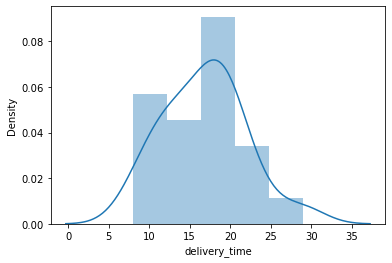

In [5]:
sns.distplot(dataset['delivery_time'])

C:\Users\Sharda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

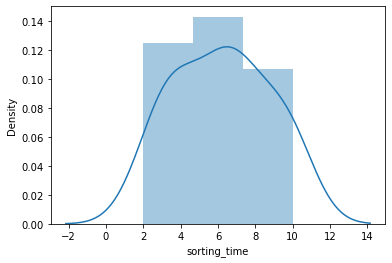

In [6]:
sns.distplot(dataset['sorting_time'])

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

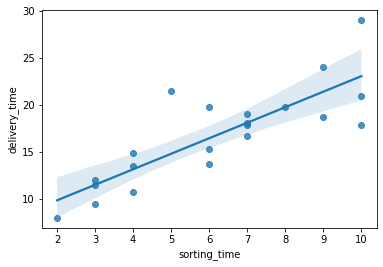

In [7]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

C:\Users\Sharda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delivery_time'>

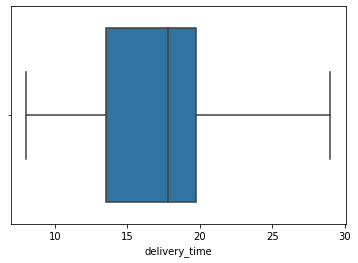

In [8]:
sns.boxplot(dataset.delivery_time)

C:\Users\Sharda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sorting_time'>

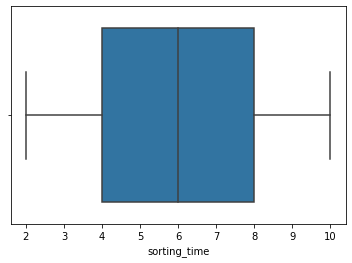

In [9]:
sns.boxplot(dataset.sorting_time)

There is no outliers and missing values in the data

In [10]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


#### Model Building

In [11]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           3.98e-06
Time:                        21:30:27   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model.params    # Finding Coefficient parameters

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [14]:
model.tvalues , model.pvalues    # Finding tvalues and pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

Since, pvalue for sorting_time < 0.05

Thus, sorting_time is significant variable

In [15]:
model.rsquared , model.rsquared_adj   # Finding Rsquared Values

(0.6822714748417231, 0.6655489208860244)

Adjusted R square = 66.55%

We can consider this model.

delivery_time = 6.582734 + 1.649020 * sorting_time

#### Model Predictions

In [16]:
# Manual prediction for sorting time = 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [17]:
# Automatic Prediction for sorting time 5, 8
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [18]:
data_pred = pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [19]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [20]:
pred = model.predict(dataset.iloc[:,1]) # Predicted values of Delivery_Time using the model

Text(0, 0.5, 'Delivery_Time')

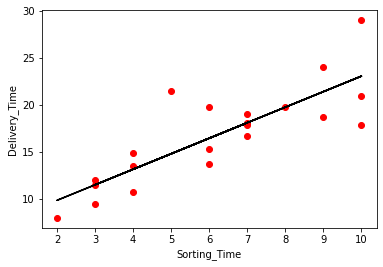

In [21]:
# Visualization of regresion line over the scatter plot of Sorting_Time and Delivery_Time
import matplotlib.pylab as plt
plt.scatter(x=dataset['sorting_time'],y=dataset['delivery_time'],color='red')
plt.plot(dataset['sorting_time'],pred,color='black')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

In [22]:
pred.corr(dataset.delivery_time)

0.8259972607955327

### Transforming variables for accuracy

### Log Transformation

In [23]:
model2 = smf.ols('delivery_time ~ np.log(sorting_time)',data=dataset).fit()

In [24]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           2.64e-06
Time:                        21:30:33   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model2.predict(data_pred)

0    15.714496
1    19.964933
dtype: float64

In [26]:
pred2 = model2.predict(dataset.iloc[:,1]) # Predicted values of Delivery_Time using the model
#pred2

In [27]:
pred2.corr(dataset.delivery_time)

0.8339325279256244

### Exponential Transformation

In [28]:
model3 = smf.ols('np.log(delivery_time) ~ sorting_time',data=dataset).fit()

In [29]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sun, 03 Apr 2022   Prob (F-statistic):           1.59e-06
Time:                           21:30:35   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
a = model3.predict(data_pred)
a

0    2.649130
1    2.965785
dtype: float64

In [31]:
np.exp(a)

0    14.141728
1    19.409927
dtype: float64

In [32]:
pred_log = model3.predict(dataset.iloc[:,1]) # Predicted values of Delivery_Time using the model
#pred_log

In [33]:
pred3 = np.exp(pred_log)  # as we have used log(Delivery_Time) in preparing model so we need to convert it back
#pred3

In [34]:
pred3.corr(dataset.delivery_time)

0.8085780108289259

### so we will consider the model having highest Adj R-Squared value which is the exponential transformation - model3

In [35]:
resid_3 = pred3-dataset.delivery_time

In [36]:
# getting residuals of the entire data set
student_resid = model3.resid_pearson 
student_resid

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

Text(0, 0.5, 'Standardized Residual')

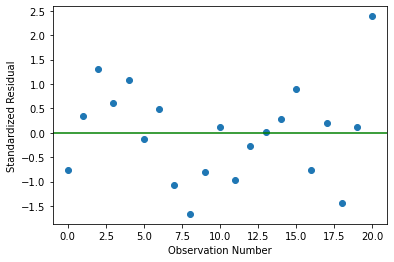

In [37]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

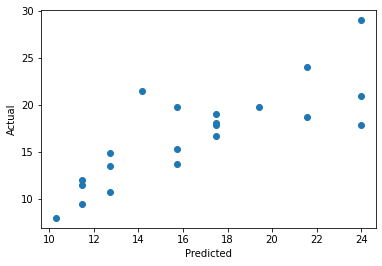

In [38]:
# Predicted vs actual values
plt.scatter(x=pred3,y=dataset.delivery_time)
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Salary_hike -> Build a prediction model for Salary_hike. Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

EDA and Data Visualization, Feature Engineering, Correlation Analysis, Model Building, Model Testing and Model Predictions using simple linear regression.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [40]:
# import dataset
dataset = pd.read_csv('Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### EDA and Data Visualization 

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\Sharda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

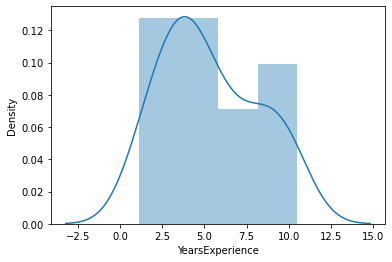

In [42]:
sns.distplot(dataset['YearsExperience'])

C:\Users\Sharda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

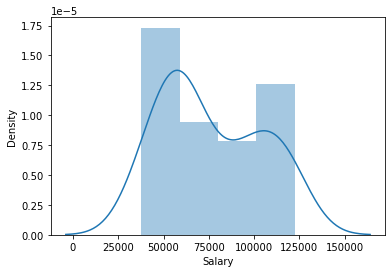

In [43]:
sns.distplot(dataset['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

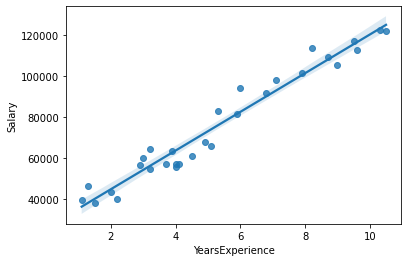

In [44]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

C:\Users\Sharda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

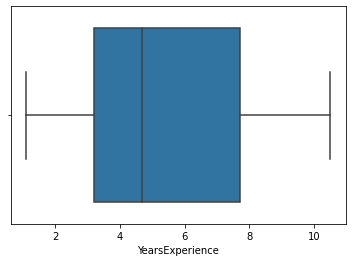

In [45]:
sns.boxplot(dataset.YearsExperience)

C:\Users\Sharda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

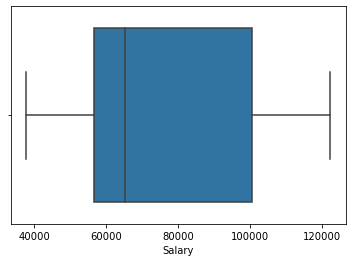

In [46]:
sns.boxplot(dataset.Salary)

There is no outliers and missing values in the data

In [47]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### Model Building

In [48]:
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           1.14e-20
Time:                        21:30:41   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
model.params    # Finding Coefficient parameters

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [51]:
model.tvalues , model.pvalues    # Finding tvalues and pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

Since, pvalue for YearsExperience < 0.05

Thus, sorting_time is significant variable

In [52]:
model.rsquared , model.rsquared_adj   # Finding Rsquared Values

(0.9569566641435086, 0.9554194021486339)

Adjusted R square = 95.54%

We can consider this model.

Salary = 25792.200199 + 9449.962321 * YearsExperience

#### Model Predictions

In [53]:
# Manual prediction for 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [54]:
# Automatic Prediction for 3 & 5 Years Experience
new_data = pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [55]:
data_pred = pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [56]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

In [57]:
pred = model.predict(dataset.iloc[:,0]) # Predicted values of Salary using the model

Text(0, 0.5, 'Salary')

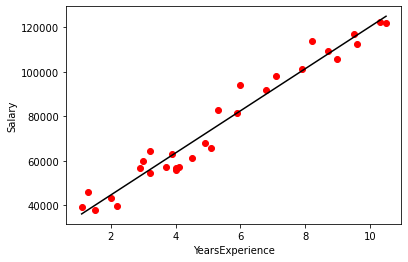

In [58]:
# Visualization of regresion line over the scatter plot of YearsExperience and Salary
import matplotlib.pylab as plt
plt.scatter(x=dataset['YearsExperience'],y=dataset['Salary'],color='red')
plt.plot(dataset['YearsExperience'],pred,color='black')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [59]:
pred.corr(dataset.Salary)

0.9782416184887601

### Transforming variables for accuracy

### Log Transformation

In [60]:
model2 = smf.ols('Salary ~ np.log(YearsExperience)',data=dataset).fit()

In [61]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           3.25e-13
Time:                        21:30:44   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model2.predict(data_pred)

0    59511.842441
1    80242.161754
dtype: float64

In [63]:
pred2 = model2.predict(dataset.iloc[:,0]) # Predicted values of Salary using the model
#pred2

In [64]:
pred2.corr(dataset.Salary)

0.924061081788264

### Exponential Transformation

In [65]:
model3 = smf.ols('np.log(Salary) ~ YearsExperience',data=dataset).fit()

In [66]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           7.03e-18
Time:                        21:30:46   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
a = model3.predict(data_pred)
a

0    10.883761
1    11.134666
dtype: float64

In [68]:
np.exp(a)

0    53303.675386
1    68505.296532
dtype: float64

In [69]:
pred_log = model3.predict(dataset.iloc[:,0]) # Predicted values of Delivery_Time using the model
#pred_log

In [70]:
pred3 = np.exp(pred_log)  # as we have used log(Delivery_Time) in preparing model so we need to convert it back
#pred3

In [71]:
pred3.corr(dataset.Salary)

0.9660469705377088

### so we will consider the model having highest Adj R-Squared value which is the without transformation - model

In [72]:
resid = pred-dataset.Salary

In [73]:
# getting residuals of the entire data set
student_resid = model.resid_pearson 
student_resid

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

Text(0, 0.5, 'Standardized Residual')

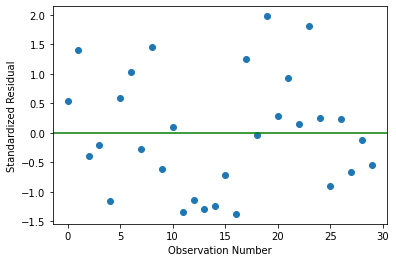

In [74]:
plt.plot(model.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

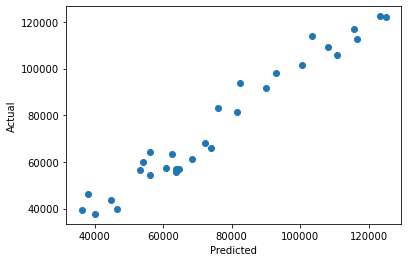

In [75]:
# Predicted vs actual values
plt.scatter(x=pred,y=dataset.Salary)
plt.xlabel("Predicted")
plt.ylabel("Actual")